## Import Libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\dell\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Dataset:

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

## Review features:

In [3]:
# Overview of the dataset
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [4]:
# Shape of the dataset
df.shape

# here we clearly see there is 10000 rows and 12 cols..

(10000, 14)

In [5]:
# Here is the info of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# getting some statistical measures about the data
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [7]:
# Let's check the missing value in cols..
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
# check Duplicate values...
df.duplicated().sum()

0

## Visualization:

In [9]:
# now let's check imp cols details..

## Age:

In [10]:
df['Age'].describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

In [12]:
df['Age'].value_counts().head(10)

Age
37    478
38    477
35    474
36    456
34    447
33    442
40    432
39    423
32    418
31    404
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

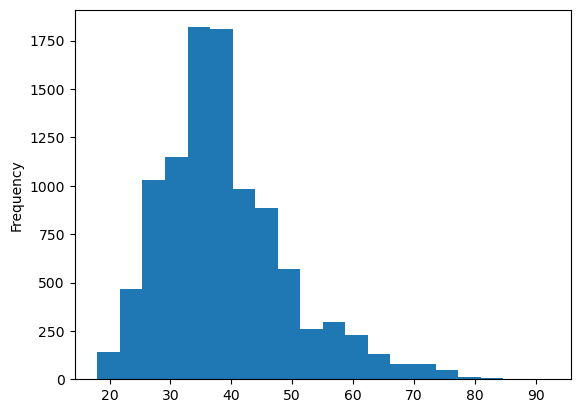

In [13]:
df['Age'].plot(kind='hist',bins=20)
# distribution of the people in bins...

<Axes: ylabel='Density'>

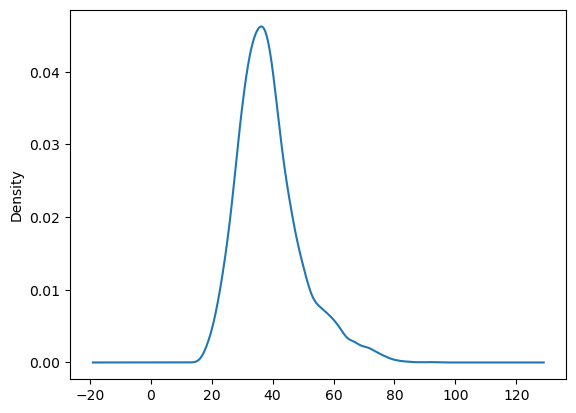

In [14]:
df['Age'].plot(kind='kde')

<Axes: >

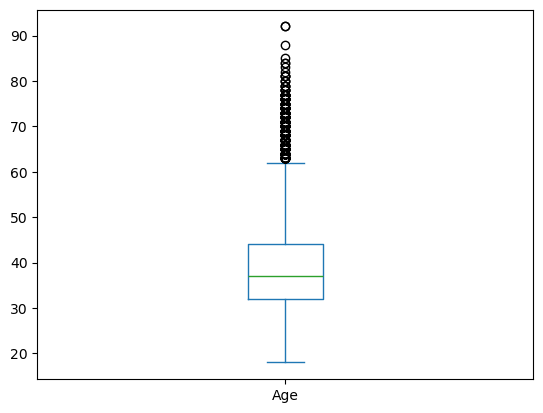

In [15]:
# to check outliers:
df['Age'].plot(kind='box')

In [16]:
df[df['Age'] > 65]

RowNumber  CustomerId        Surname  CreditScore Geography  Gender  \
58           59    15623944          T'ien          511     Spain  Female   
85           86    15805254        Ndukaku          652     Spain  Female   
158         159    15589975        Maclean          646    France  Female   
230         231    15808473       Ringrose          673    France    Male   
234         235    15704769          Smith          585    France  Female   
...         ...         ...            ...          ...       ...     ...   
9736       9737    15644103          Wells          659     Spain    Male   
9747       9748    15775761  Iweobiegbunam          610   Germany  Female   
9753       9754    15705174      Chiedozie          656   Germany    Male   
9894       9895    15704795          Vagin          521    France  Female   
9936       9937    15653037          Parks          609    France    Male   

      Age  Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
58     66       4       0.00              1          1               0   
85     75      10       0.00              2          1               1   
158    73       6   97259.25              1          0               1   
230    72       1       0.00              2          0               1   
234    67       5  113978.97              2          0               1   
...   ...     ...        ...            ...        ...             ...   
9736   78       2  151675.65              1          0               1   
9747   69       5   86038.21              3          0               0   
9753   68       7  153545.11              1          1               1   
9894   77       6       0.00              2          1               1   
9936   77       1       0.00              1          0               1   

      EstimatedSalary  Exited  
58            1643.11       1  
85          114675.75       0  
158         104719.66       0  
230         111981.19       0  
234          93146.11       0  
...               ...     ...  
9736         49978.67       0  
9747        192743.06       1  
9753        186574.68       0  
9894         49054.10       0  
9936         18708.76       0  

[264 rows x 14 columns]

In [17]:
df['Age'].isnull().sum() # missing value

0

## Exited:

In [18]:
# Do value_counts to check how much customer exited..
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

<Axes: xlabel='Exited'>

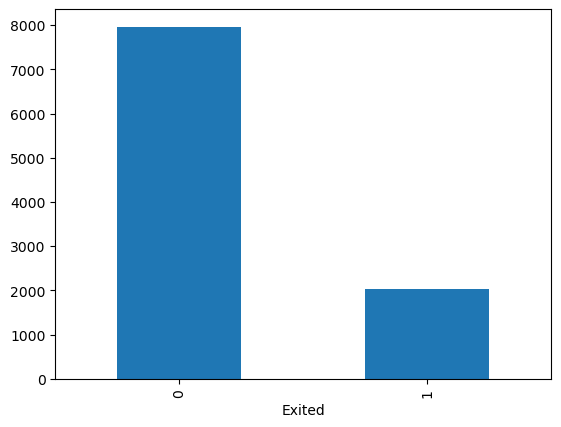

In [19]:
df['Exited'].value_counts().plot(kind='bar')


<Axes: ylabel='count'>

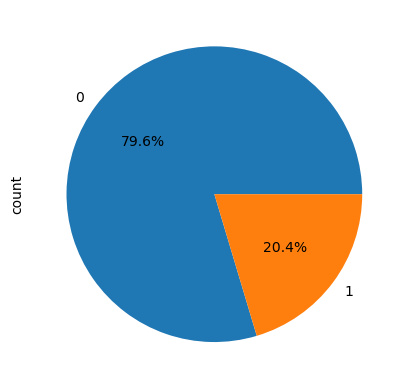

In [20]:
# now let's see how much people exited:

df['Exited'].value_counts().plot(kind='pie',autopct='%0.1f%%')



In [285]:
df['Exited'].isnull().sum()

0

## EstimatedSalary:

In [286]:
df['EstimatedSalary'].isnull().sum()

0

In [287]:
df['EstimatedSalary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

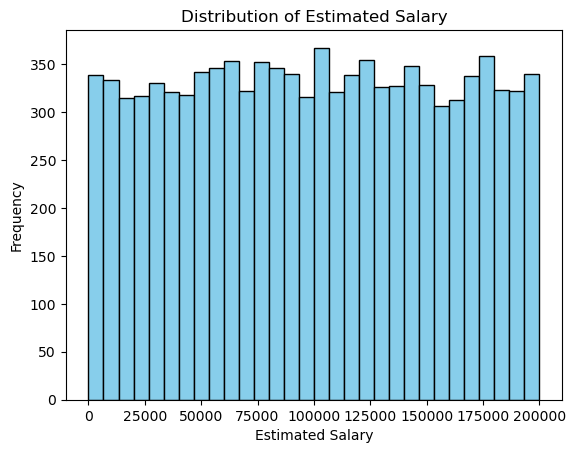

In [288]:
df['EstimatedSalary'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Estimated Salary')
plt.xlabel('Estimated Salary')
plt.ylabel('Frequency')
plt.show()


<Axes: ylabel='Density'>

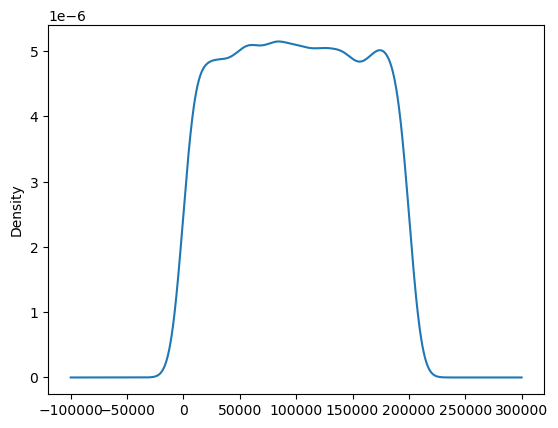

In [289]:
df['EstimatedSalary'].plot(kind='kde')

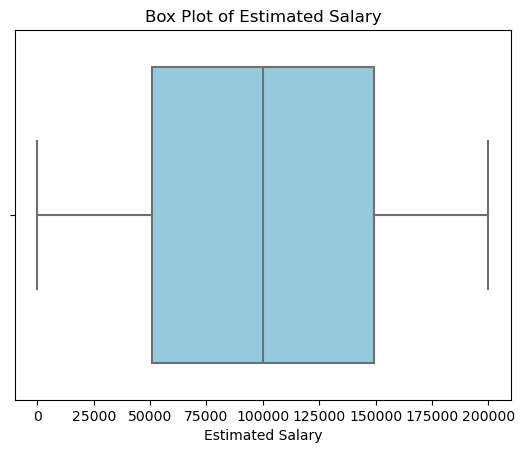

In [290]:
sns.boxplot(x=df['EstimatedSalary'], color='skyblue')
plt.title('Box Plot of Estimated Salary')
plt.xlabel('Estimated Salary')
plt.show()


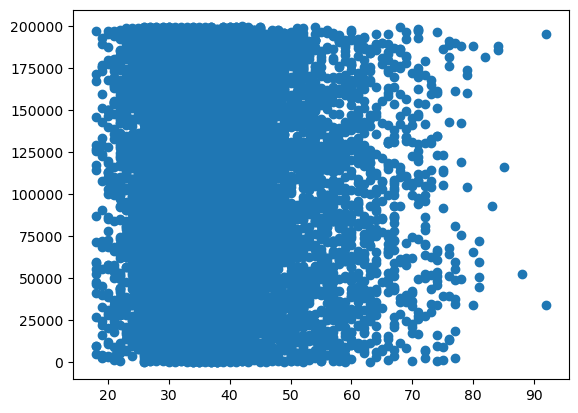

In [291]:
# Age and EstimatedSalary  correlation
plt.scatter(df['Age'], df['EstimatedSalary']) 

C:\Users\dell\AppData\Local\Temp\ipykernel_18776\2698601909.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'][df['Exited']==0])
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dell\AppData\Local\Temp\ipykernel_18776\2698601909.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar 

<Axes: xlabel='Age', ylabel='Density'>

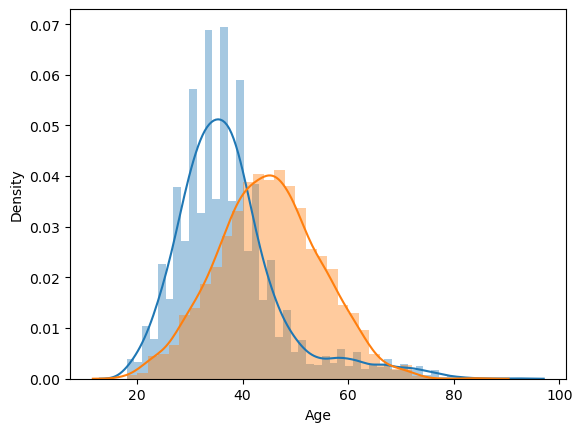

In [292]:
# Age and Exited col corealtion

sns.distplot(df['Age'][df['Exited']==0])
sns.distplot(df['Age'][df['Exited']==1])

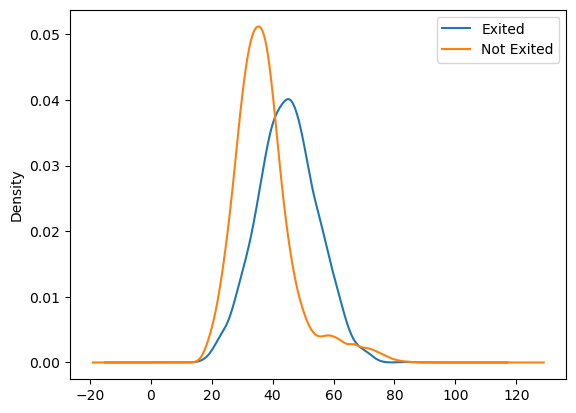

In [293]:
# Age and Exited col:

df[df['Exited'] ==1]['Age'].plot(kind='kde', label='Exited')
df[df['Exited'] ==0]['Age'].plot(kind='kde',label='Not Exited')

plt.legend()
plt.show()

## Geography

In [294]:
# Customers country...
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [295]:
df['Geography'].isnull().sum()

0

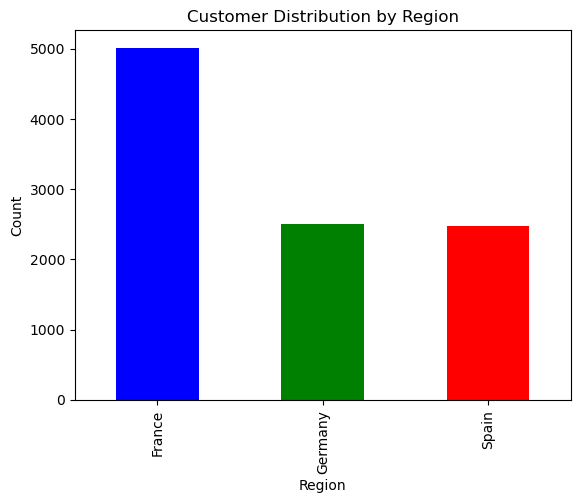

In [296]:
df['Geography'].value_counts().plot(kind='bar', color=['blue', 'green', 'red'])
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()


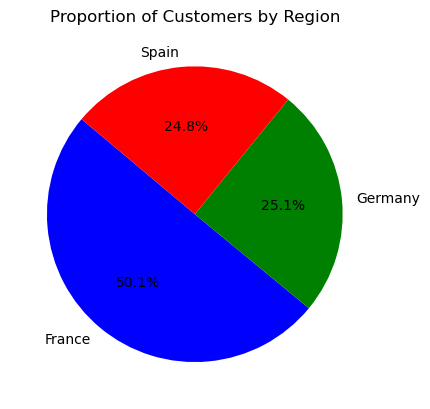

In [297]:
df['Geography'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'green', 'red'], startangle=140)
plt.title('Proportion of Customers by Region')
plt.ylabel('')  # Hide y-label
plt.show()


## Gender:

In [298]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

<Axes: xlabel='Gender'>

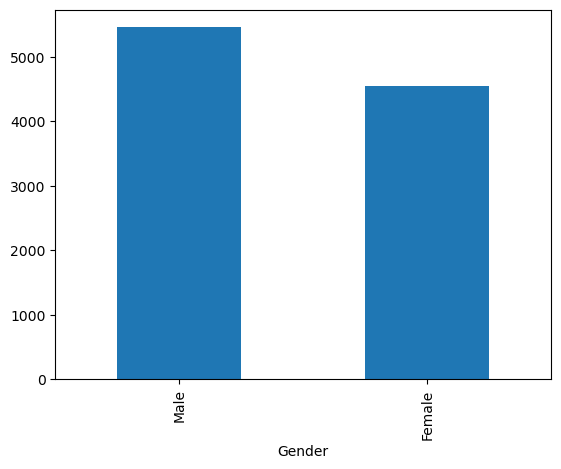

In [299]:
df['Gender'].value_counts().plot(kind='bar')

<Axes: xlabel='Gender', ylabel='count'>

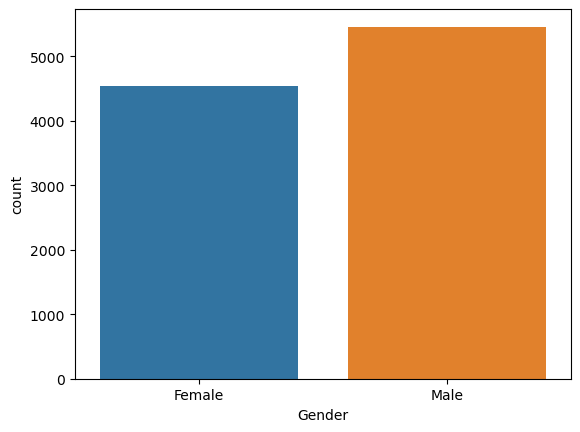

In [300]:
sns.countplot(x='Gender', data=df)

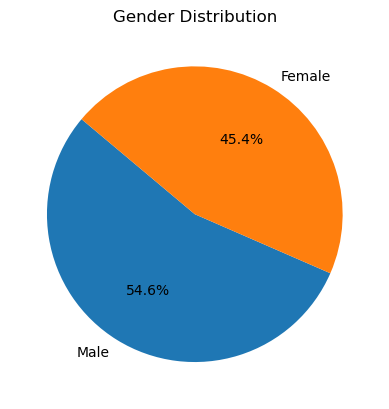

In [301]:
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.ylabel('')  # Hide y-label
plt.show()

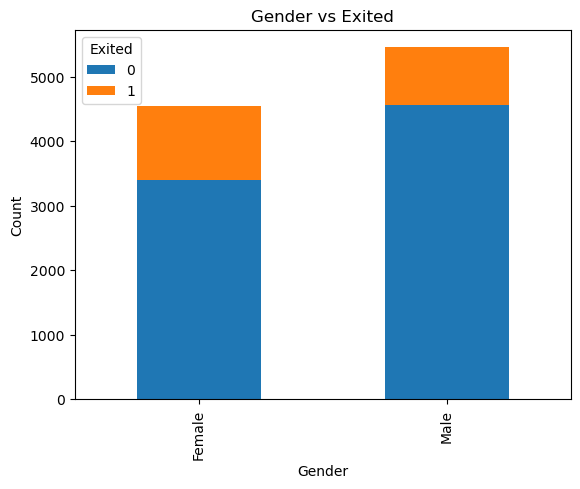

In [302]:
pd.crosstab(df['Gender'], df['Exited']).plot(kind='bar', stacked=True)
plt.title('Gender vs Exited')
plt.ylabel('Count')
plt.show()

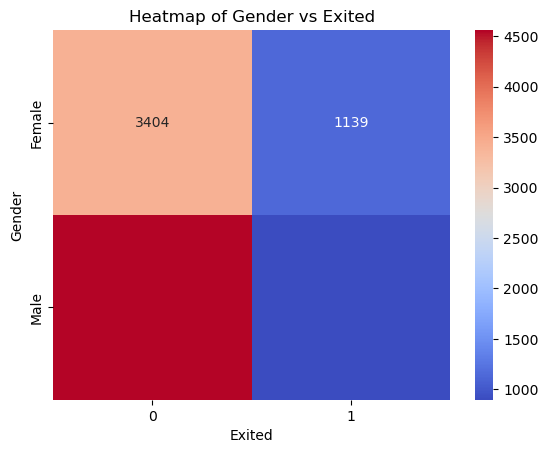

In [303]:
sns.heatmap(pd.crosstab(df['Gender'], df['Exited']), annot=True, fmt='d', cmap='coolwarm')
plt.title('Heatmap of Gender vs Exited')
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_18776\1761931899.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Gender'] == 'Male']['Age'], label='Male', shade=True)
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dell\AppData\Local\Temp\ipykernel_18776\1761931899.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Gender'] == 'Female']['Age'], label='Female', shade=True)
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

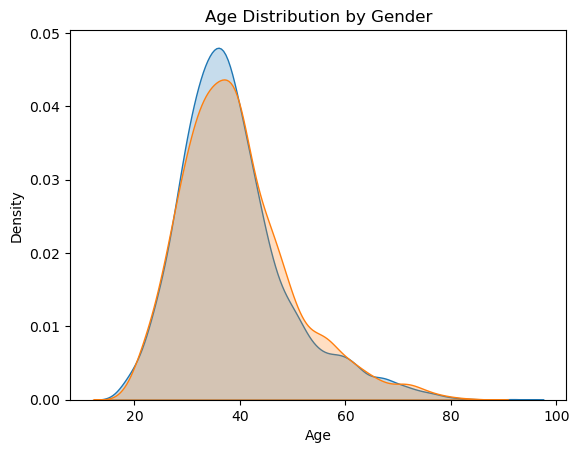

In [304]:
sns.kdeplot(df[df['Gender'] == 'Male']['Age'], label='Male', shade=True)
sns.kdeplot(df[df['Gender'] == 'Female']['Age'], label='Female', shade=True)
plt.title('Age Distribution by Gender')
plt.show()

In [305]:
df['Gender'].isnull().sum()

0

## HasCrCard:

In [306]:
#  Indicates how much customer has a credit card...
df['HasCrCard'].value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

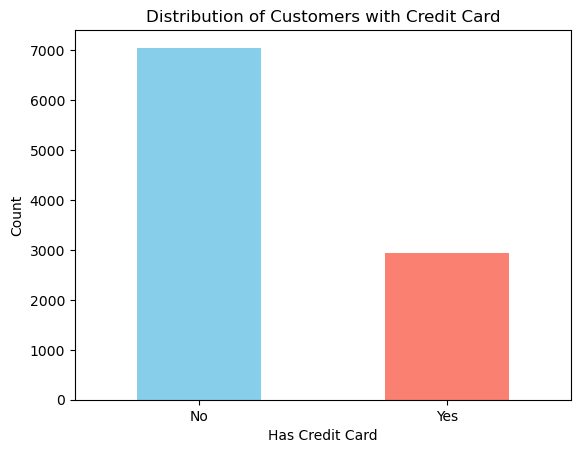

In [307]:
df['HasCrCard'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Customers with Credit Card')
plt.ylabel('Count')
plt.xlabel('Has Credit Card')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.show()

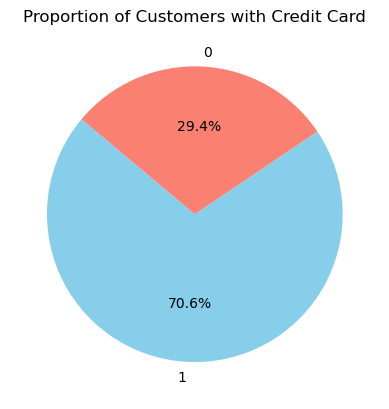

In [308]:
df['HasCrCard'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'])
plt.title('Proportion of Customers with Credit Card')
plt.ylabel('')  # Hide y-label
plt.show()

In [309]:
df['HasCrCard'].isnull().sum()

0

## IsActiveMember:

In [310]:
# Indicates whether the customer is an active member or not
df['IsActiveMember'].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

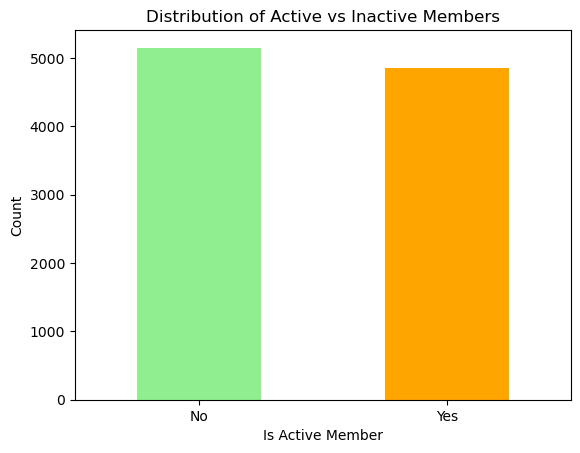

In [311]:
df['IsActiveMember'].value_counts().plot(kind='bar', color=['lightgreen', 'orange'])
plt.title('Distribution of Active vs Inactive Members')
plt.ylabel('Count')
plt.xlabel('Is Active Member')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
plt.show()


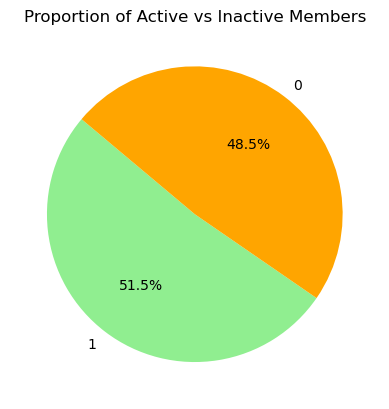

In [312]:
df['IsActiveMember'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'orange'])
plt.title('Proportion of Active vs Inactive Members')
plt.ylabel('')  # Hide y-label
plt.show()


In [313]:
df['HasCrCard'].isnull().sum()

0

## Feature Engineering:

In [314]:
#Now we can clearly see some cols are and some cols are not imp as other's like RowNumber , 
# surname and NumOfProducts these three cols are not imp as compare to other's.... 
# let's drope these cols:

df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [315]:
# here are some categorical cols we need to convert them into numerical coz there's some ML Algo need numerical data for training..
# To convert categorical into numerical there is fucntion in pandas (get_dumies) we use this function,
# there is another technique in ML called OneHOtEncoding (OHE) this technique is also used for encoding ..

df = pd.get_dummies(df, columns=['Geography','Gender'], drop_first=True)

In [323]:
df.head()

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0               1        101348.88       1              False   
1               1        112542.58       0              False   
2               0        113931.57       1              False   
3               0         93826.63       0              False   
4               1         79084.10       0              False   

   Geography_Spain  Gender_Male  
0            False        False  
1             True        False  
2            False        False  
3            False        False  
4             True        False

# Scalling:

In [316]:
# now we need to do scalling cozz there's some cols in dataset that have imbalanced values, these cols genrate some
# issue while prediction so we need to Scalled these cols..

# To do scalling 1st we need to do train_test_split..

X = df.drop(columns=['Exited'])   #Input cols...
y = df['Exited'] # output cols..
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size=0.2,random_state=2 )

In [317]:
X_train

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
8856          774   26       5       0.00              2          1   
1545          602   42       6  158414.85              1          1   
8136          716   38       1       0.00              2          1   
7768          601   20       9  122446.61              2          1   
7782          585   54       8   87105.32              1          1   
...           ...  ...     ...        ...            ...        ...   
1099          494   38       7       0.00              2          1   
2514          592   26       4  105082.07              2          1   
6637          850   36       3       0.00              2          1   
2575          551   54       5  102994.04              1          1   
7336          654   28       7       0.00              2          1   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
8856               1         64716.08              False            False   
1545               1        131886.46               True            False   
8136               1         99661.46              False            False   
7768               0         86791.90              False             True   
7782               1         55346.14              False            False   
...              ...              ...                ...              ...   
1099               1          6203.66              False             True   
2514               0        132801.57               True            False   
6637               0        195033.07              False            False   
2575               0        176680.16               True            False   
7336               0        151316.37              False            False   

      Gender_Male  
8856        False  
1545        False  
8136        False  
7768        False  
7782         True  
...           ...  
1099         True  
2514        False  
6637         True  
2575         True  
7336        False  

[8000 rows x 11 columns]

In [324]:
y_train

8856    0
1545    0
8136    0
7768    0
7782    0
       ..
1099    0
2514    0
6637    0
2575    1
7336    0
Name: Exited, Length: 8000, dtype: int64

In [325]:
X_test

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
7878          731   38      10  123711.73              2          1   
3224          645   41       2  138881.04              1          1   
1919          618   56       7       0.00              1          1   
4432          621   33       4       0.00              2          1   
4835          561   34       4   85141.79              2          1   
...           ...  ...     ...        ...            ...        ...   
9073          702   60       5  138597.54              2          1   
8584          731   19       6       0.00              2          1   
5390          735   38       1       0.00              3          0   
5092          688   39       0       0.00              2          1   
2964          721   46       1  115764.32              2          0   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
7878               0        171340.68              False            False   
3224               0        129936.53               True            False   
1919               1        142400.27              False            False   
4432               1         40299.23              False             True   
4835               1         29217.37              False             True   
...              ...              ...                ...              ...   
9073               1         41536.59               True            False   
8584               1        151581.79              False            False   
5390               0         92220.12              False            False   
5092               0         53222.15              False            False   
2964               0        102950.79              False            False   

      Gender_Male  
7878        False  
3224        False  
1919         True  
4432         True  
4835         True  
...           ...  
9073        False  
8584         True  
5390        False  
5092        False  
2964         True  

[2000 rows x 11 columns]

In [326]:
y_test

7878    1
3224    1
1919    1
4432    0
4835    0
       ..
9073    1
8584    0
5390    1
5092    1
2964    0
Name: Exited, Length: 2000, dtype: int64

In [327]:
# Now import StandaredScalling class

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [328]:
X_train_Scaled = scaler.fit_transform(X_train)
X_test_Scaled = scaler.transform(X_test)

In [329]:
X_train_Scaled

array([[ 1.27754581, -1.23264342, -0.012743  , ..., -0.58408625,
        -0.57138416, -1.0862028 ],
       [-0.49959477,  0.28410615,  0.33282985, ...,  1.71207591,
        -0.57138416, -1.0862028 ],
       [ 0.67827747, -0.09508124, -1.39503438, ..., -0.58408625,
        -0.57138416, -1.0862028 ],
       ...,
       [ 2.06279398, -0.28467494, -0.70388869, ..., -0.58408625,
        -0.57138416,  0.9206384 ],
       [-1.02653762,  1.42166833, -0.012743  , ...,  1.71207591,
        -0.57138416,  0.9206384 ],
       [ 0.03768029, -1.04304972,  0.67840269, ..., -0.58408625,
        -0.57138416, -1.0862028 ]])

In [330]:
X_train_Scaled = pd.DataFrame(X_train_Scaled, columns=X_train.columns)

## Effect of Scaling:

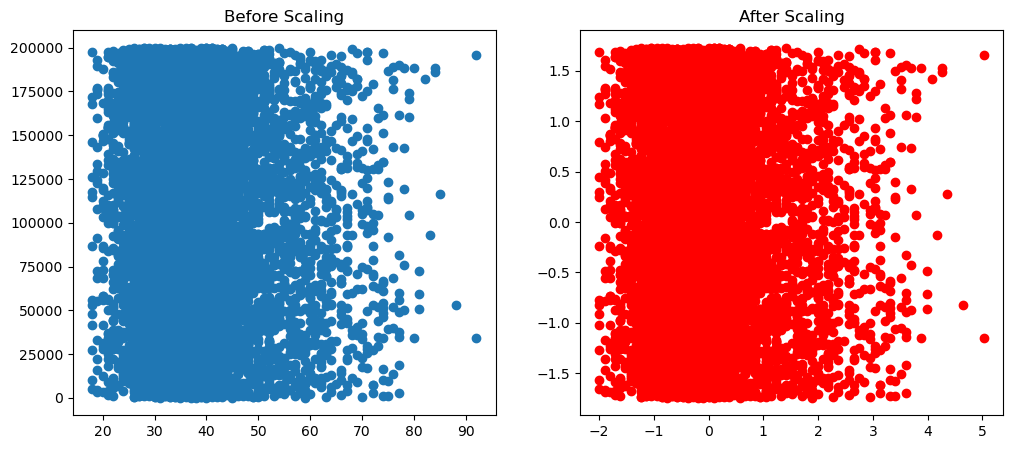

In [331]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_Scaled['Age'], X_train_Scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

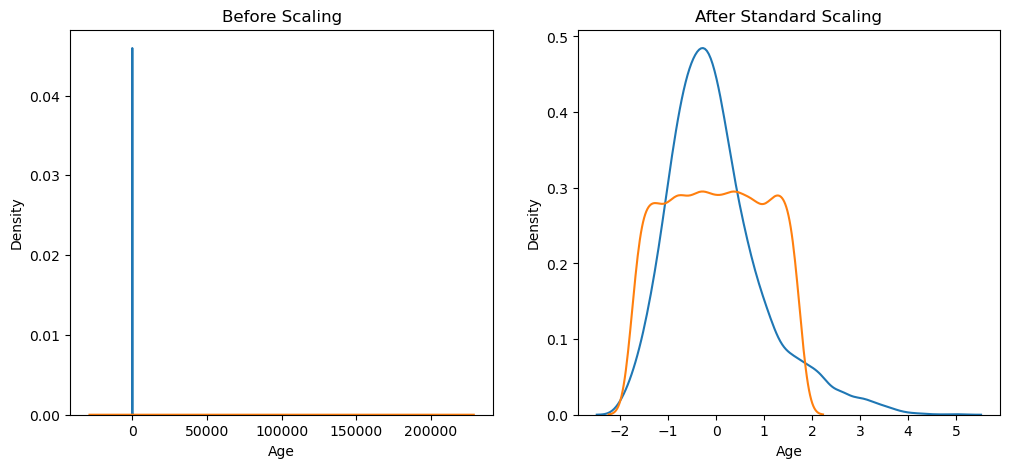

In [332]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_Scaled['Age'], ax=ax2)
sns.kdeplot(X_train_Scaled['EstimatedSalary'], ax=ax2)
plt.show()

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


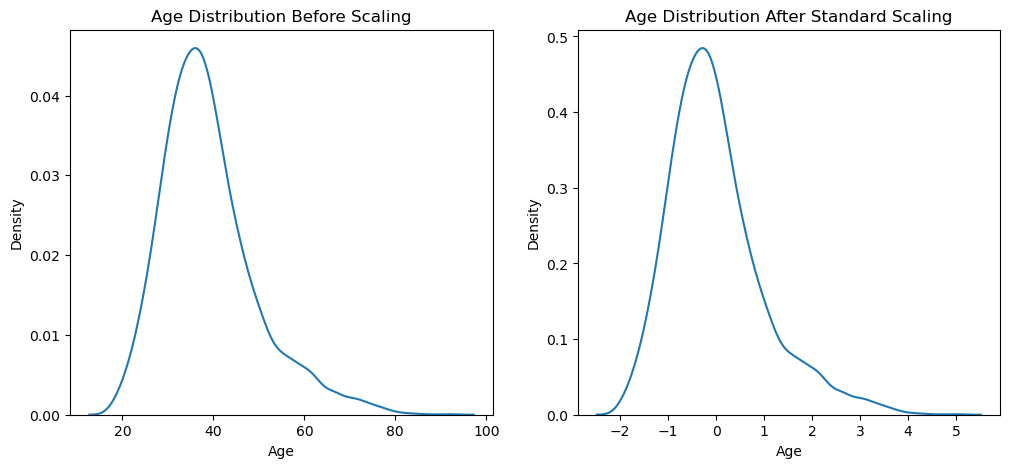

In [333]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_Scaled['Age'], ax=ax2)
plt.show()

C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


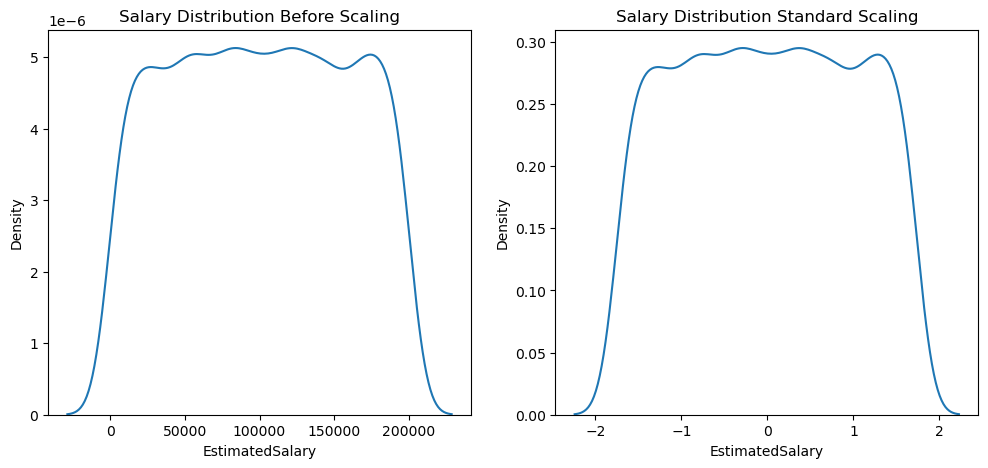

In [338]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_Scaled['EstimatedSalary'], ax=ax2)
plt.show()

## Identify patterns and potential predictors of churn.

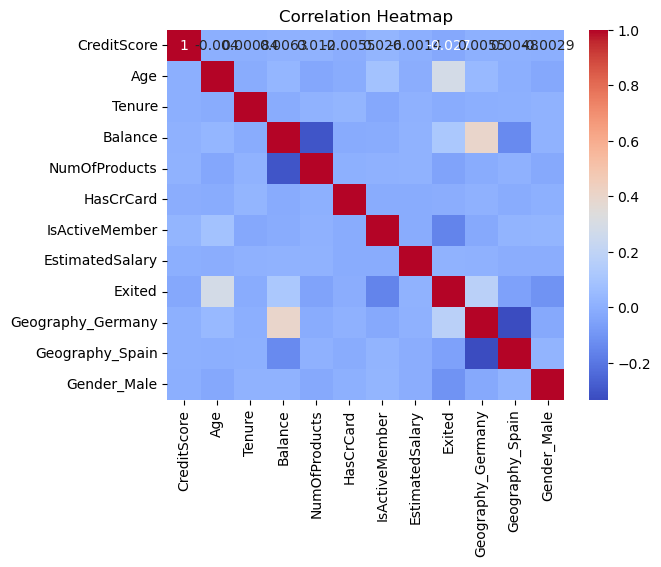

In [337]:
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\dell\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is depr

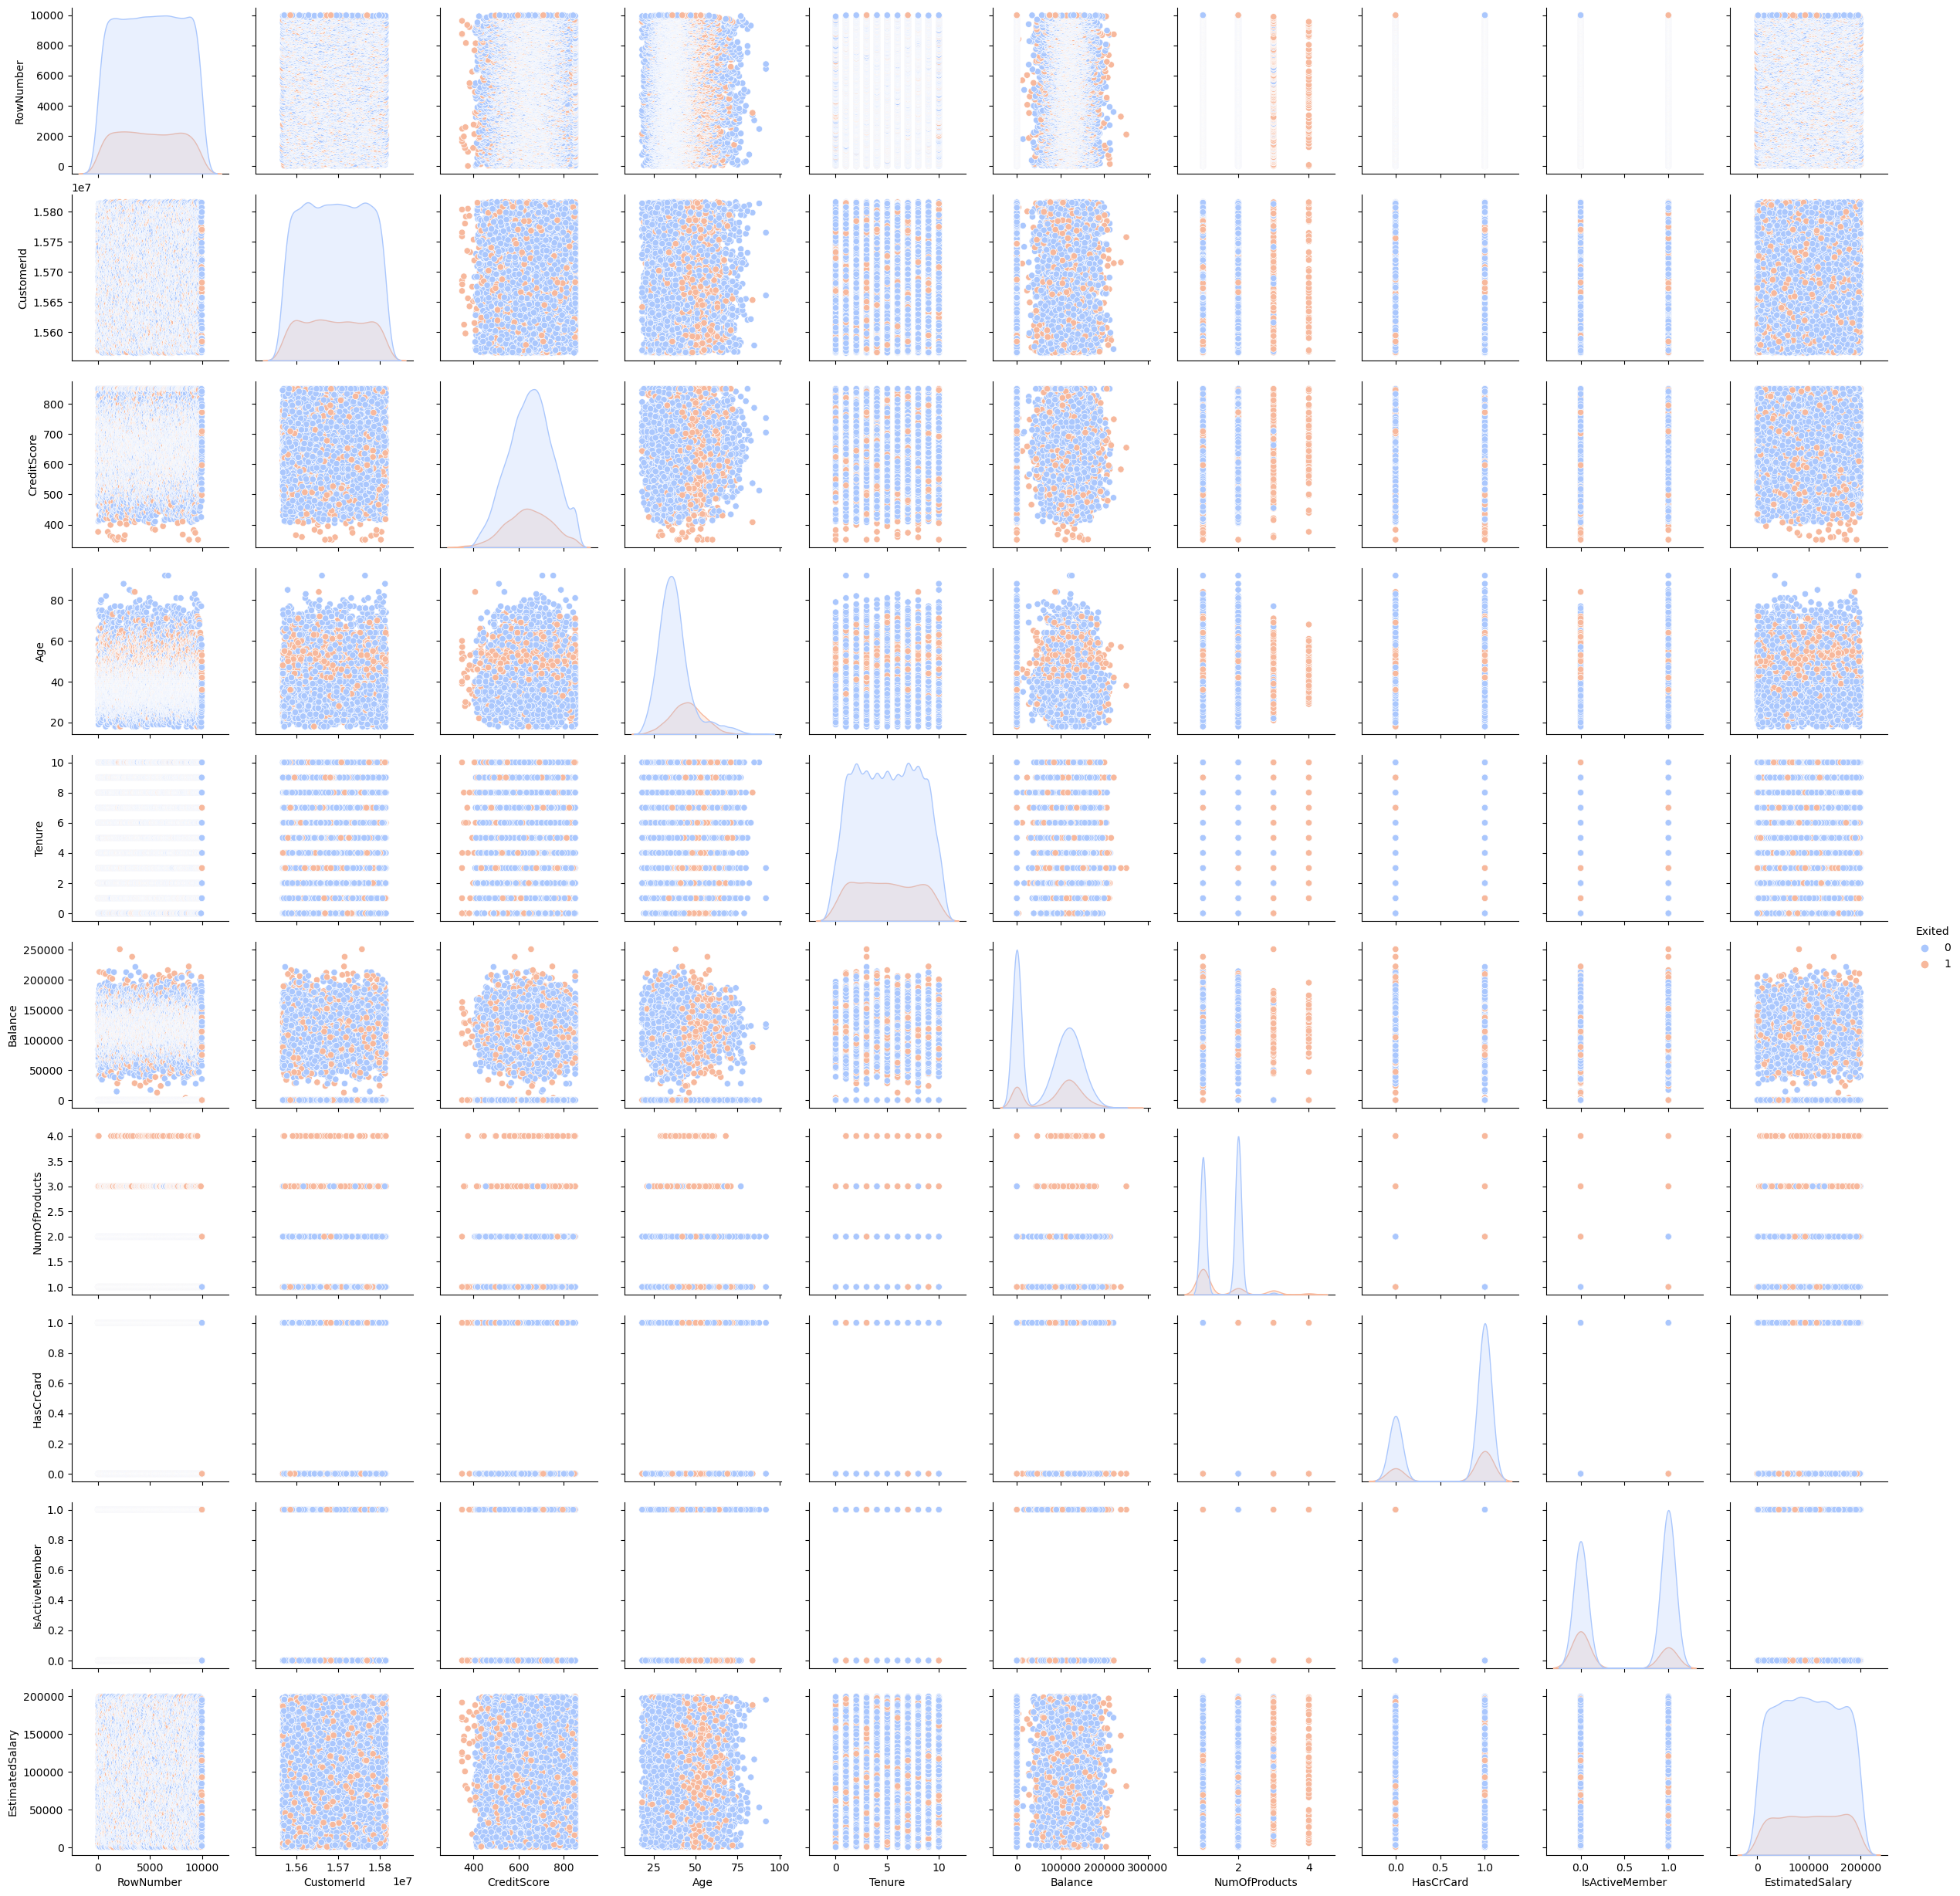

In [348]:

sns.pairplot(df, hue='Exited', palette='coolwarm')
plt.show()


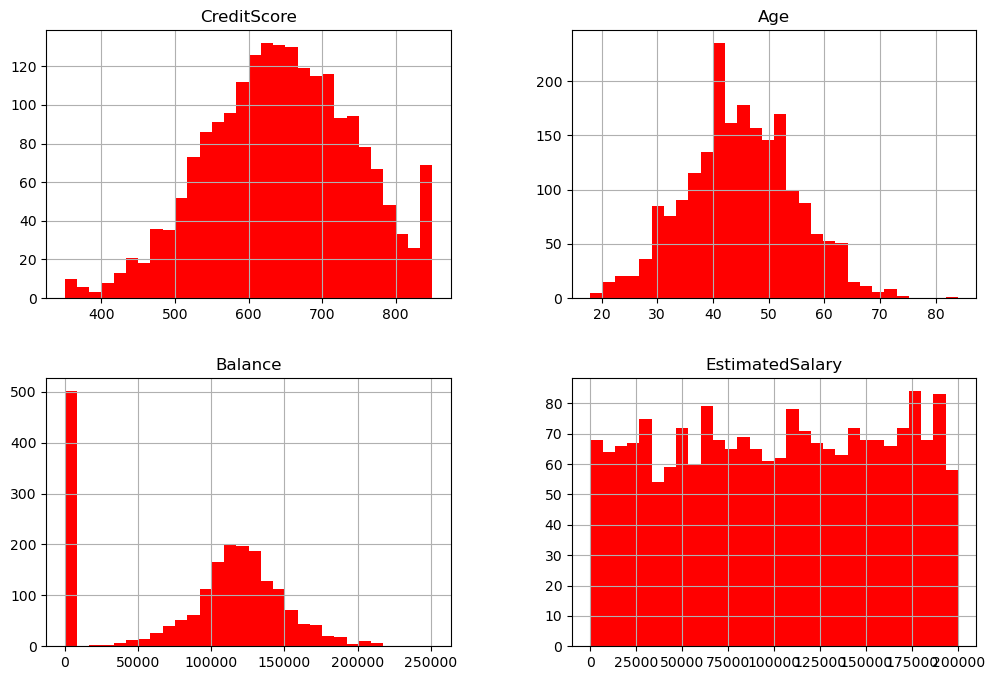

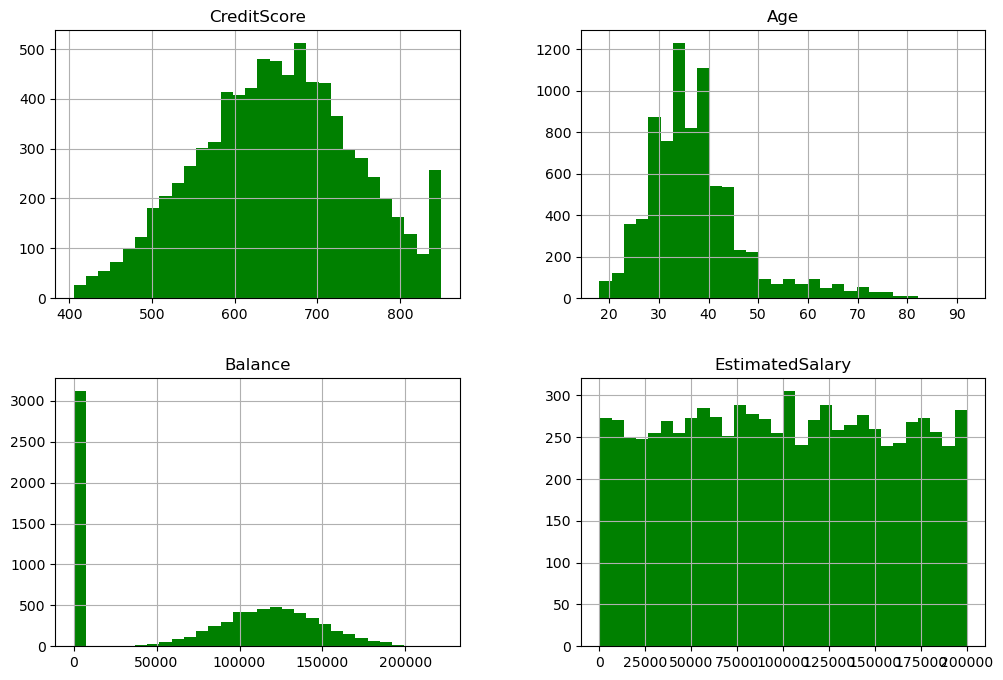

In [349]:
df[df['Exited'] == 1][['CreditScore', 'Age', 'Balance', 'EstimatedSalary']].hist(bins=30, figsize=(12, 8), color='red')
df[df['Exited'] == 0][['CreditScore', 'Age', 'Balance', 'EstimatedSalary']].hist(bins=30, figsize=(12, 8), color='green')
plt.show()


In [350]:
churn_corr = correlation['Exited'].sort_values(ascending=False)
print(churn_corr)


Exited               1.000000
Age                  0.285323
Geography_Germany    0.173488
Balance              0.118533
EstimatedSalary      0.012097
HasCrCard           -0.007138
Tenure              -0.014001
CreditScore         -0.027094
NumOfProducts       -0.047820
Geography_Spain     -0.052667
Gender_Male         -0.106512
IsActiveMember      -0.156128
Name: Exited, dtype: float64
